<a href="https://www.kaggle.com/code/abdulrhmaneldeeb/fatigue-strength-prediction?scriptVersionId=193753029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing libraries

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import os 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from joblib import dump ,load
plt.style.use('ggplot')
fontdict = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'normal',
    'size': 14,
}


## Loading data 

In [52]:
df_1=pd.read_csv('/kaggle/input/steel-fatigue-strength-prediction/data.csv')


In [53]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

In [54]:
df_1.shape

(437, 27)

In [55]:
df_1.isnull().sum()

Sl. No.     0
NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [56]:
df_1.columns

Index(['Sl. No.', 'NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo',
       'RedRatio', 'dA', 'dB', 'dC', 'Fatigue'],
      dtype='object')

In [57]:
df_3=df_1.copy()
df_3.columns=['Sl. No.','Normalizing Temp','Through Hardening Temp','Through Hardening Time','Cooling Rate for Through Hardening','Carburization Temp',
             'Carburization Time','Diffusion Temp','Diffusion time','Quenching Media Temp','Tempering Temp','Tempering Time','Cooling Rate for Tempering',
             'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo','Reduction Ratio',
              'Area Proportion of Inclusions Deformed by Plastic Work','Area Proportion of Inclusions Occurring in Discontinuous Array',
              'Area Proportion of Isolated Inclusions','Fatigue Strength (10^7 Cycles)']

## EDA 

In [58]:
df_3.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
Normalizing Temp,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
Through Hardening Temp,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
Through Hardening Time,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
Cooling Rate for Through Hardening,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
Carburization Temp,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Carburization Time,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
Diffusion Temp,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Diffusion time,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
Quenching Media Temp,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000
Tempering Temp,437.0,536.842105,164.101963,30.000,550.000,600.000,650.000,680.000


### Histogram of columns 

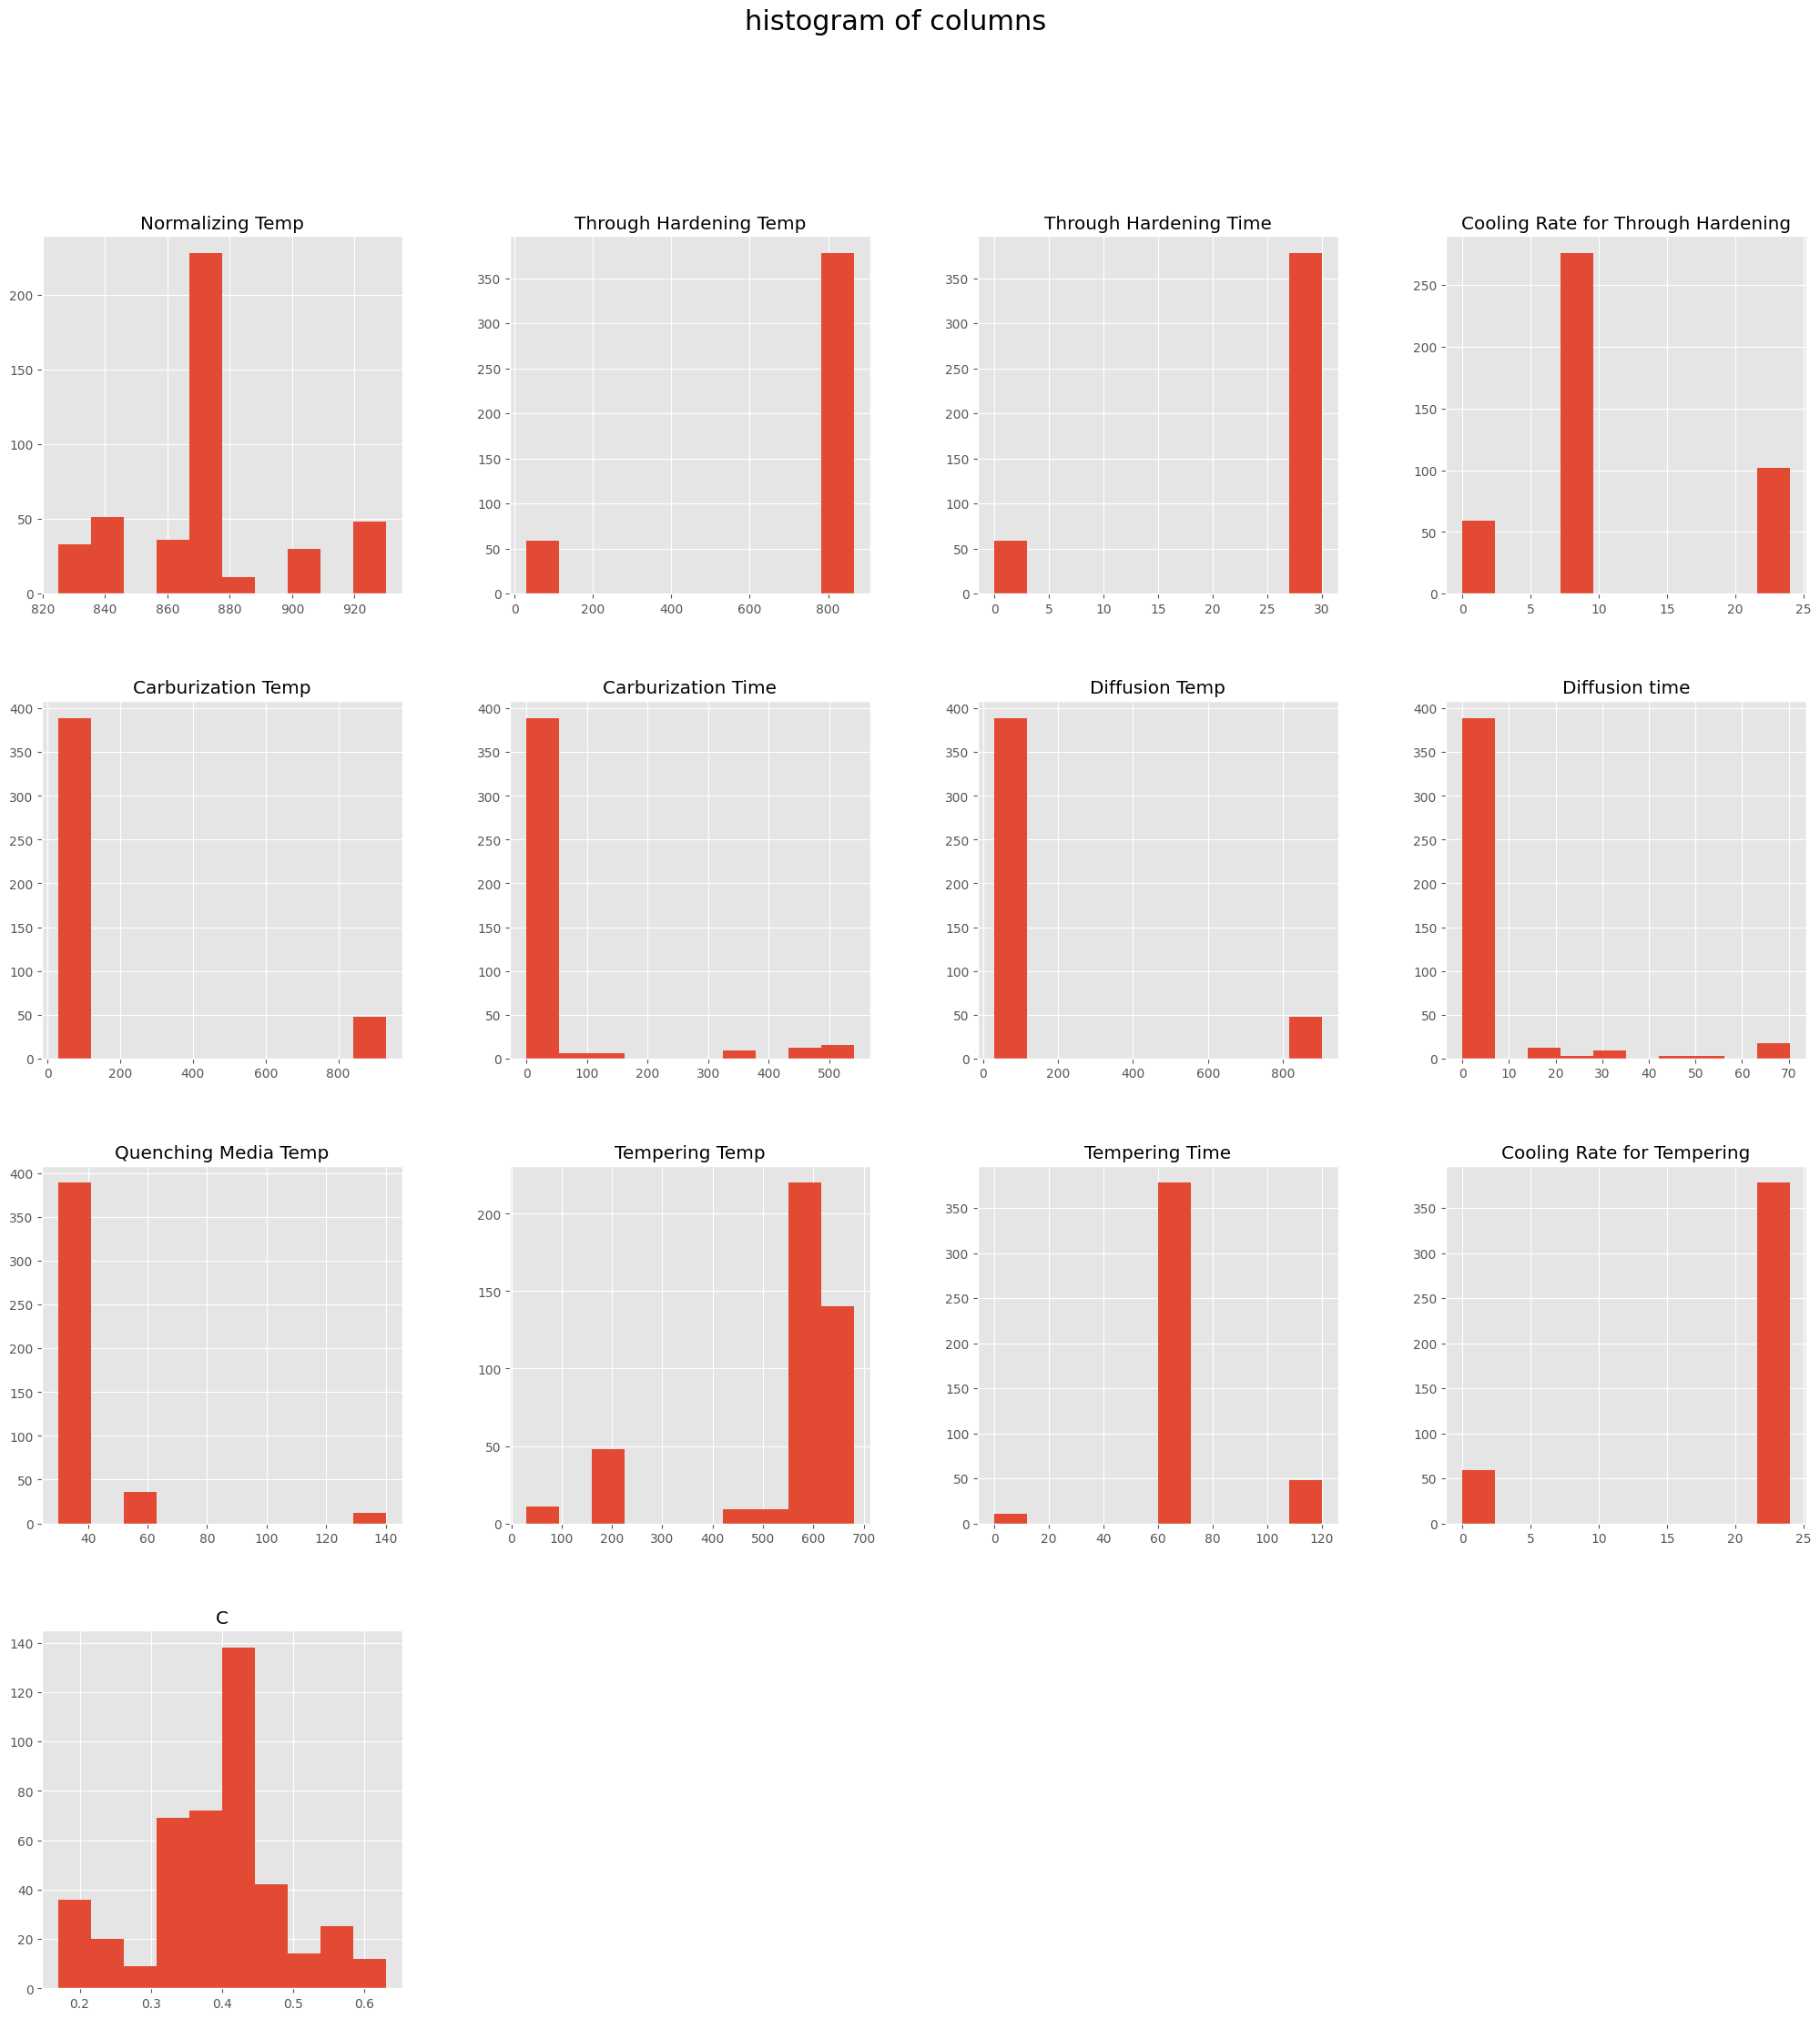

In [59]:
df_3.iloc[:,1:14].hist(figsize=(25,25))
plt.suptitle('histogram of columns',fontsize=22)
plt.show()

###  Correlation between diffrent features and Fatigue Strength 
#### green columns indicate positive correlation (Direct propotionalty) 
#### red columns indicate negative correlation (Inverse propotionality)

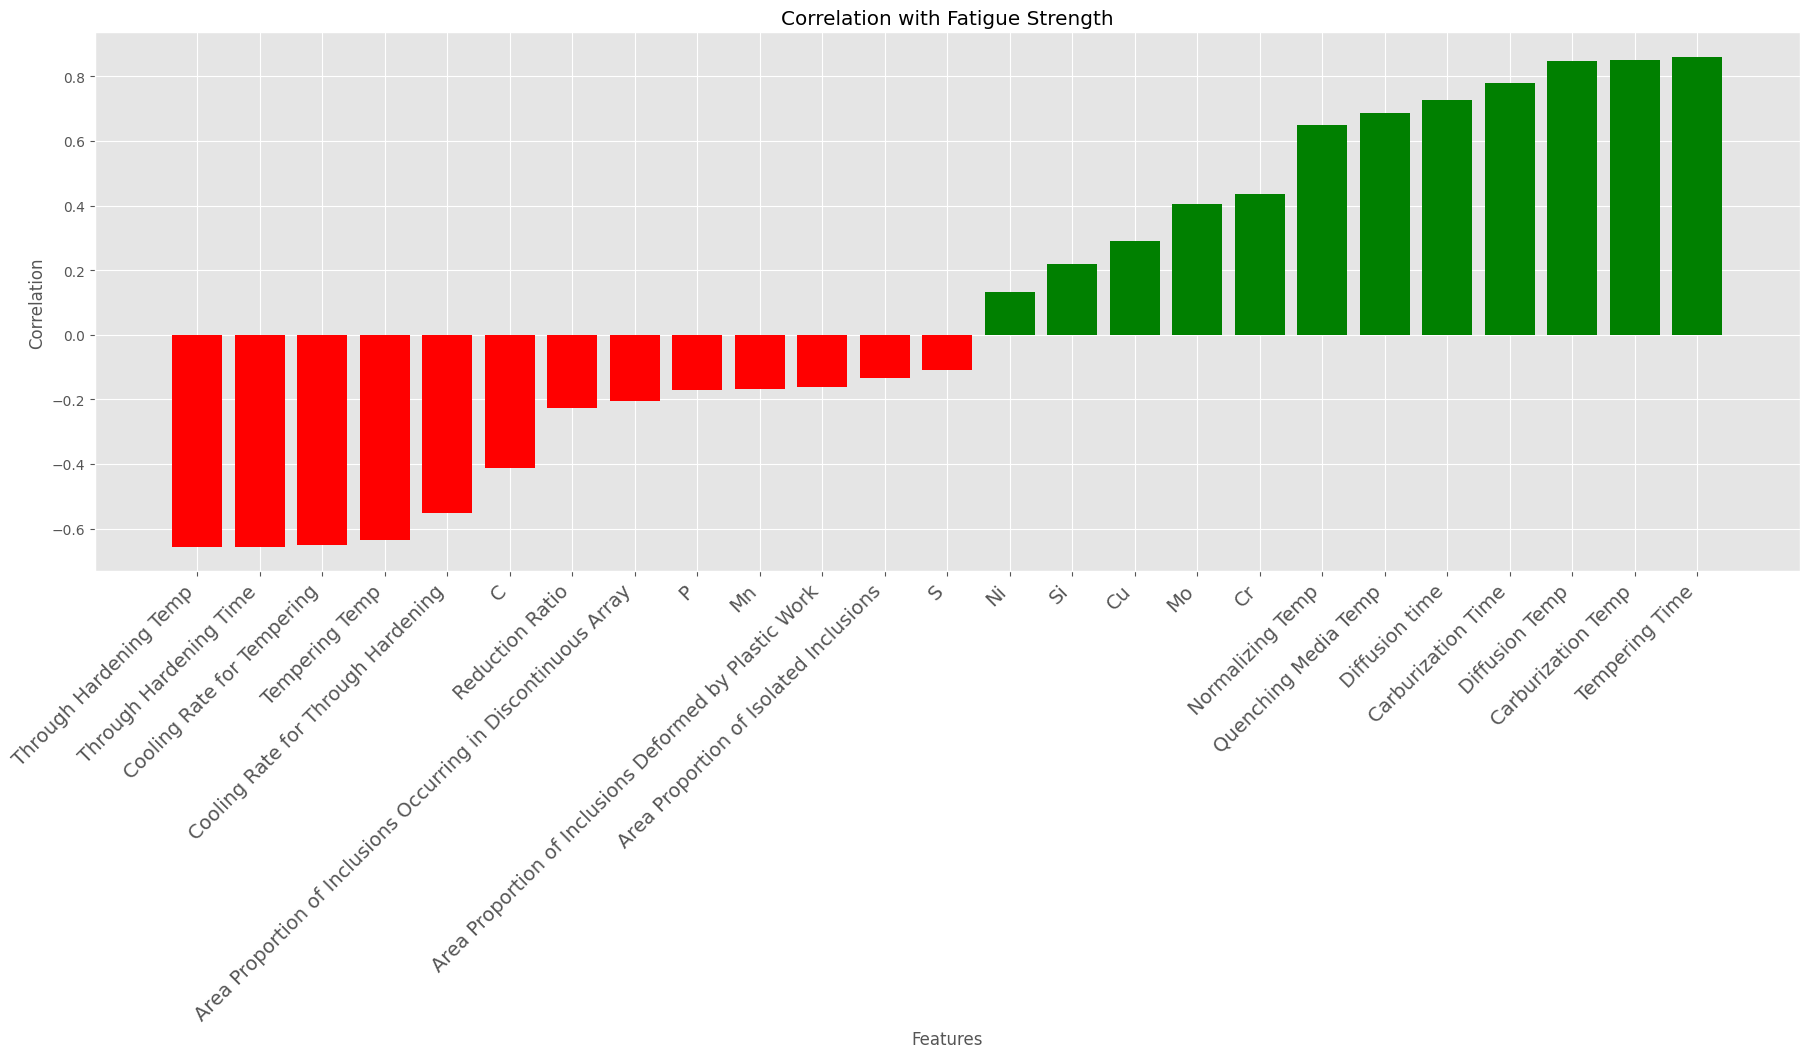

In [113]:
correlation = df_3.drop(columns=['Sl. No.','Fatigue Strength (10^7 Cycles)']).corrwith(df_3['Fatigue Strength (10^7 Cycles)'])
correlation.sort_values(inplace=True)
plt.figure(figsize=(22,7))
plt.bar(correlation.index, correlation, color=['green' if val >= 0 else 'red' for val in correlation])
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation with Fatigue Strength')

plt.xticks(rotation=45, ha='right',fontsize=14)
plt.show()

### Data of top 10 fatigue strength sampels

In [61]:
df_3.sort_values('Fatigue Strength (10^7 Cycles)',ascending=False).head(10).iloc[:,:14]

,Sl. No.,Normalizing Temp,Through Hardening Temp,Through Hardening Time,Cooling Rate for Through Hardening,Carburization Temp,Carburization Time,Diffusion Temp,Diffusion time,Quenching Media Temp,Tempering Temp,Tempering Time,Cooling Rate for Tempering,C
396,397,930,30,0,0,930,540.0,850.000,15.0,140,160,120,0.5,0.23
428,429,930,30,0,0,930,340.2,895.812,70.2,60,160,120,0.5,0.21
390,391,930,30,0,0,930,139.8,850.000,15.0,60,160,120,0.5,0.23
393,394,930,30,0,0,930,469.8,850.000,15.0,60,160,120,0.5,0.23
423,424,930,30,0,0,930,499.8,895.812,70.2,60,200,120,0.5,0.23
399,400,930,30,0,0,930,469.8,850.000,15.0,60,200,120,0.5,0.23
434,435,930,30,0,0,930,340.2,895.812,70.2,60,200,120,0.5,0.21
406,407,930,30,0,0,930,450.0,895.517,34.8,60,160,120,0.5,0.18
414,415,930,30,0,0,930,100.2,895.517,34.8,60,160,120,0.5,0.23
394,395,930,30,0,0,930,469.8,850.000,15.0,60,160,120,0.5,0.17


In [62]:
df_3.sort_values('Fatigue Strength (10^7 Cycles)',ascending=False).head(10).iloc[:,14:]

,Si,Mn,P,S,Ni,Cr,Cu,Mo,Reduction Ratio,Area Proportion of Inclusions Deformed by Plastic Work,Area Proportion of Inclusions Occurring in Discontinuous Array,Area Proportion of Isolated Inclusions,Fatigue Strength (10^7 Cycles)
396,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1190
428,0.31,0.81,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.00,0.000,1144
390,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1139
393,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1124
423,0.20,0.80,0.013,0.018,0.04,1.14,0.07,0.02,690,0.070,0.00,0.010,1120
399,0.35,0.51,0.008,0.012,1.69,0.55,0.11,0.18,860,0.070,0.01,0.000,1110
434,0.31,0.81,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.00,0.000,1104
406,0.26,0.76,0.009,0.014,0.56,0.62,0.12,0.17,690,0.060,0.00,0.000,1089
414,0.20,0.80,0.013,0.018,0.04,1.14,0.07,0.02,690,0.070,0.00,0.010,1086
394,0.28,0.55,0.002,0.016,1.64,0.45,0.05,0.16,440,0.017,0.00,0.008,1082


## Creating Regression Model

### Spiltting data into train and test 

In [63]:
x=df_3.drop(columns=['Sl. No.','Fatigue Strength (10^7 Cycles)'])
y=df_3['Fatigue Strength (10^7 Cycles)']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


### Creating a Random forest regression model

In [65]:
forest_reg=RandomForestRegressor(n_estimators=100, max_depth=100)
forest_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=100)

In [66]:
y_pred_1=forest_reg.predict(x_test)
rmse_forest=np.sqrt(mean_squared_error(y_test,y_pred_1))
r2_forest=r2_score(y_test,y_pred_1)
scores = cross_val_score(forest_reg, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('RMSE for Random Forest:',rmse_scores.mean()) 
print('R squared for Random Forest:',r2_forest) 

RMSE for Random Forest: 135.93882749521958
R squared for Random Forest: 0.98539231084054


### Feature that has affects Fatigue Strength most  

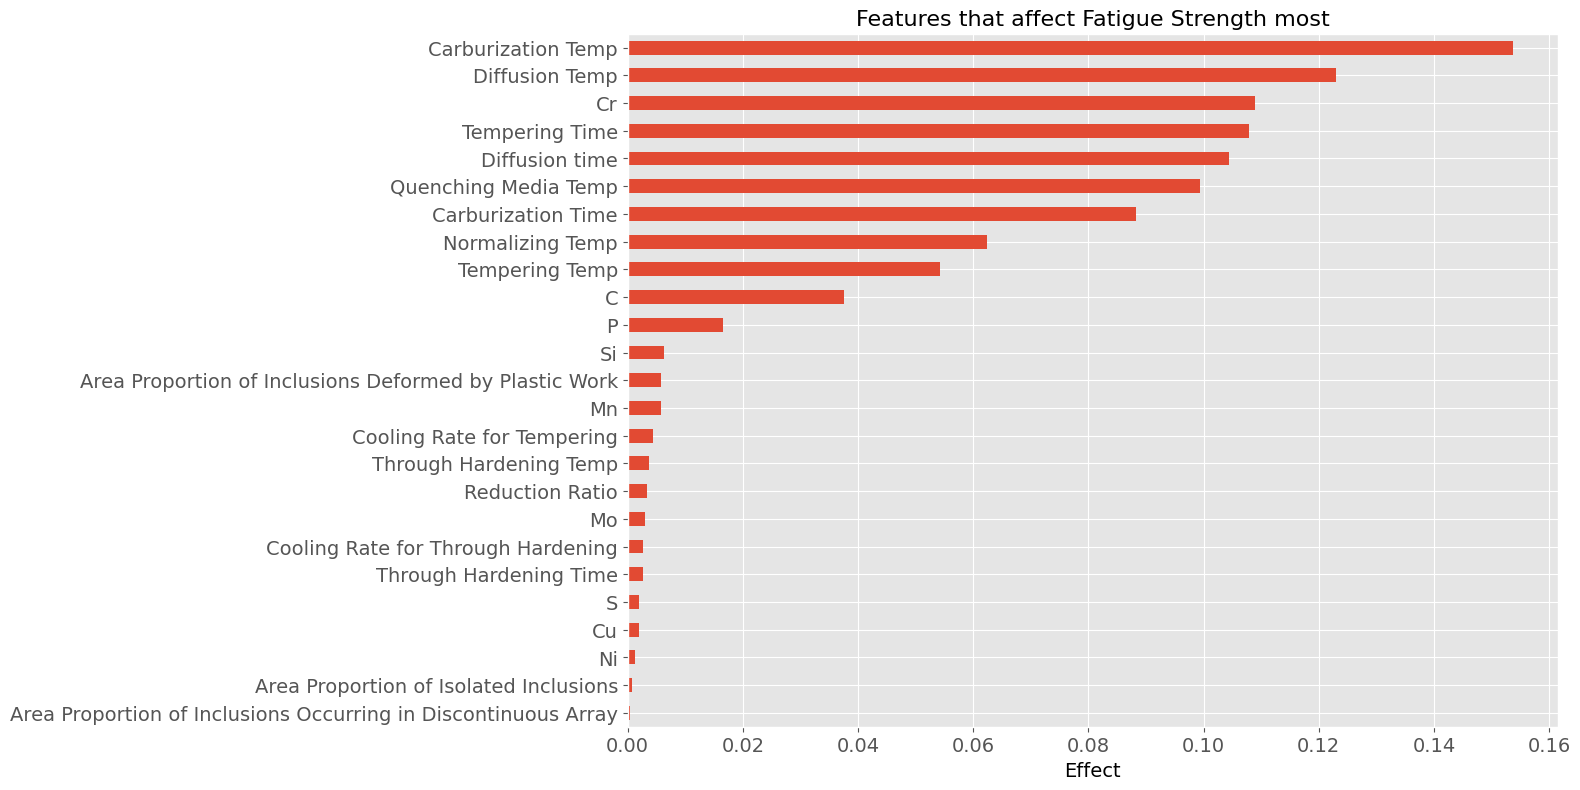

In [67]:
labels=x_train.columns
importanes=forest_reg.feature_importances_
importance_dict=dict(zip(labels,importanes))
importance_series=pd.Series(importance_dict)
importance_series=importance_series.sort_values(ascending=True)
plt.figure(figsize=(12,9))
importance_series.plot(kind='barh')
plt.title('Features that affect Fatigue Strength most',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Effect',fontdict=fontdict)
plt.show()

## Creating a Artifitial Neural Network for regression

In [103]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler_1 = MinMaxScaler()

X_train_scaled = scaler.fit_transform(x_train.values)
X_test_scaled = scaler.transform(x_test.values)
y_train_scaled=scaler_1.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled=scaler_1.transform(y_test.values.reshape(-1,1))

In [104]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])
from keras.callbacks  import EarlyStopping 
early_stopping=EarlyStopping(restore_best_weights=True,monitor='val_mse',mode='min',patience=40,verbose=1)
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
history = model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=32, validation_split=0.2,callbacks=[early_stopping])


Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3282 - mse: 0.3282 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0

In [105]:
def plot_loss_and_mse_curves(history):
    """
    Plots the loss and MSE curves from a model's training history.

    Parameters:
    - history: The history object returned by the fit method of a Keras model.
               It should contain the keys 'loss', 'val_loss', 'mse', and 'val_mse'.
    """
    # Get the values from the history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mse = history.history.get('mse')
    val_mse = history.history.get('val_mse')
    
    epochs = range(1, len(loss) + 1)

    # Plot the loss values
    plt.figure(figsize=(12, 6))

#     plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the MSE values if they exist
#     if mse and val_mse:
#         plt.subplot(1, 2, 2)
#         plt.plot(epochs, mse, 'b', label='Training MSE')
#         plt.plot(epochs, val_mse, 'r', label='Validation MSE')
#         plt.title('Training and Validation MSE')
#         plt.xlabel('Epochs')
#         plt.ylabel('Mean Squared Error')
#         plt.legend()

#     plt.tight_layout()
#     plt.show()


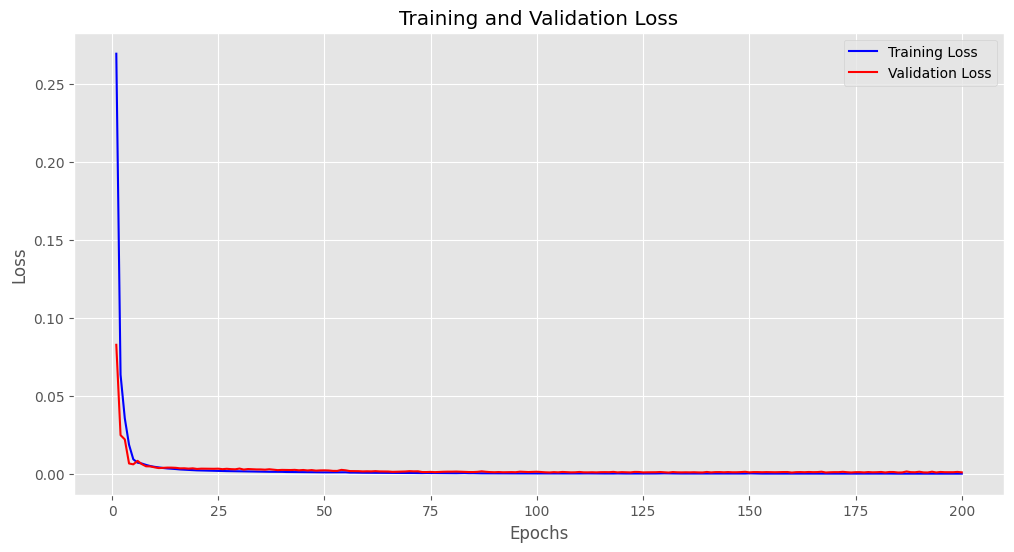

In [106]:
plot_loss_and_mse_curves(history)

In [107]:
y_pred_2=model.predict(X_test_scaled)
print('R squared for Artificial neural network: ',r2_score(scaler_1.inverse_transform(y_test_scaled),scaler_1.inverse_transform(y_pred_2)))
print('RMSE for Artificial neural network: ',np.sqrt(mean_squared_error(scaler_1.inverse_transform(y_test_scaled),scaler_1.inverse_transform(y_pred_2))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R squared for Artificial neural network:  0.9717165608504823
RMSE for Artificial neural network:  34.19600274739234


### R squared score is higher for Random forest and rmse is lower for it than Artificial neural network so we will save it to use it later for streamlit app

In [71]:
dump(forest_reg,'forest_reg.joblib')

['forest_reg.joblib']

In [109]:
import pickle 
pickle.dump(model,open('ann_model.pkl','wb'))

In [110]:
model_1=pickle.load(open('ann_model.pkl','rb'))
model_1 

<Sequential name=sequential_8, built=True>

In [111]:
y_pred_3=model_1.predict(X_test_scaled)
print('R squared for Artificial neural network: ',r2_score(scaler_1.inverse_transform(y_test_scaled),scaler_1.inverse_transform(y_pred_3)))
print('RMSE for Artificial neural network: ',np.sqrt(mean_squared_error(scaler_1.inverse_transform(y_test_scaled),scaler_1.inverse_transform(y_pred_3))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
R squared for Artificial neural network:  0.9717165608504823
RMSE for Artificial neural network:  34.19600274739234


## Creating User Interface  